In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from matplotlib import gridspec

import sys
sys.path.append("../")
from create_spec import create_spec
from fit2gauss import fit2gauss

In [7]:
# import arrays
s = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/avg_spec.txt', dtype=int)
#s02 = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/rebins/avg_spec_dt02.txt', dtype=int)
e = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/avg_error.txt', dtype=int)
#e02 = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/rebins/avg_spec_error02.txt', dtype=int)

In [3]:
# wavelengths
line = 1403.
ll = np.arange(line-10,line+10,0.01)

In [4]:
N = s.shape[0] # len of array (in steps of 2s)

In [8]:
v_r = np.zeros(N)
v_b = np.zeros(N)
w_r = np.zeros(N)
w_b = np.zeros(N)

# v_r02 = np.zeros(N)
# v_b02 = np.zeros(N)
# w_r02 = np.zeros(N)
# w_b02 = np.zeros(N)

for i in range(0,N):

    print('i = ',i)
    
    wav = ll
    
    spec = s[i,:]
    #spec02 = s02[i,:]
    
    error = e[i,:]
    #error02 = e02[i,:]

    res = fit2gauss(wav,spec,error)
    #res02 = fit2gauss(wav,spec02,error02)
    a2g = res["a2g"] # extract fit parameters
    #a2g_02 = res02["a2g"]

    #calculate Doppler velocities and wavelengths
    line = 1403.
    c = 300.
    freq = c/line*1e3

    if a2g[1] < a2g[4]:
        v_b[i] = (a2g[1]-line)/line*3e5 # in km/s
        v_r[i] = (a2g[4]-line)/line*3e5

        w_b[i] = a2g[2]*freq
        w_r[i] = a2g[5]*freq

    else:
        v_r[i] = (a2g[1]-line)/line*3e5 # in km/s
        v_b[i] = (a2g[4]-line)/line*3e5

        w_r[i] = a2g[2]*freq
        w_b[i] = a2g[5]*freq

        
#     if a2g_02[1] < a2g_02[4]:
#         v_b02[i] = (a2g_02[1]-line)/line*3e5 # in km/s
#         v_r02[i] = (a2g_02[4]-line)/line*3e5

#         w_b02[i] = a2g_02[2]*freq
#         w_r02[i] = a2g_02[5]*freq

#     else:
#         v_r02[i] = (a2g_02[1]-line)/line*3e5 # in km/s
#         v_b02[i] = (a2g_02[4]-line)/line*3e5

#         w_r02[i] = a2g_02[2]*freq
#         w_b02[i] = a2g_02[5]*freq

    
    

i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
i =  10
i =  11
i =  12
i =  13
i =  14
i =  15
i =  16
i =  17
i =  18
i =  19
i =  20
i =  21
i =  22
i =  23
i =  24


/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
../fit2gauss.py:82: RuntimeWarning: invalid value encountered in sqrt
  sd = np.sqrt(m2)
../fit2gauss.py:35: RuntimeWarning: invalid value encountered in double_scalars
  s = mvec[3]/mvec[2]**(1.5) # the skewness
../fit2gauss.py:38: RuntimeWarning: invalid value encountered in sqrt
  dv = np.sqrt(mvec[2]/f/(1.0-f)) # estimate of separation  v_red - v_blue
../fit2gauss.py:43: RuntimeWarning: invalid value encountered in sqrt
  a0 = dx*mvec[0]/(np.sqrt(2*np.pi*mvec[2]))


In [11]:
time = np.arange(0,50,2)

(0, 140)

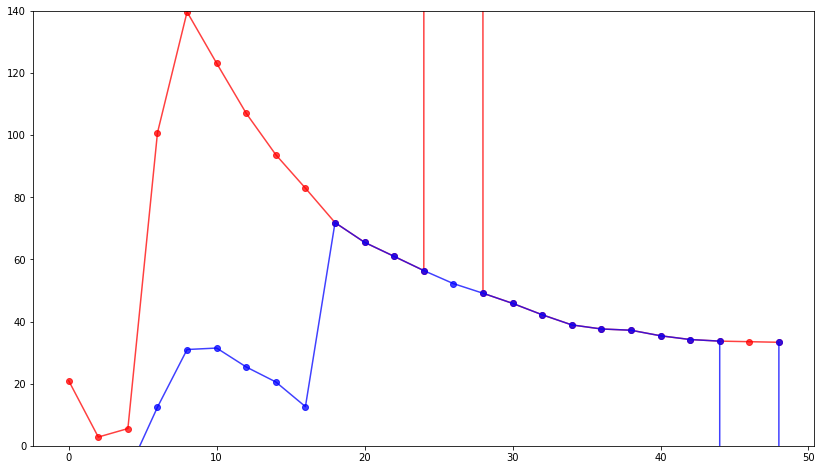

In [18]:
plt.figure(figsize=(14,8))
plt.plot(time,v_r,'r',alpha=0.75,marker='o')
plt.plot(time,v_b,'b',alpha=0.75,marker='o')
plt.ylim(0,140)

(0, 45)

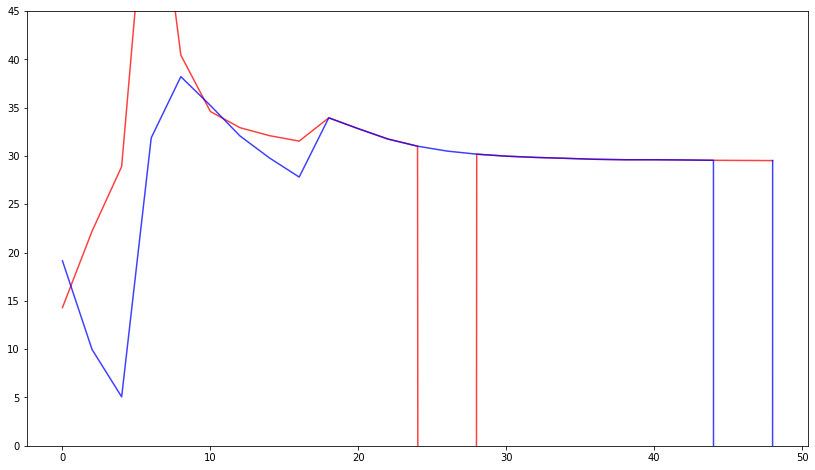

In [20]:
plt.figure(figsize=(14,8))
plt.plot(time,w_r,'r',alpha=0.75)
plt.plot(time,w_b,'b',alpha=0.75)
plt.ylim(0,45)

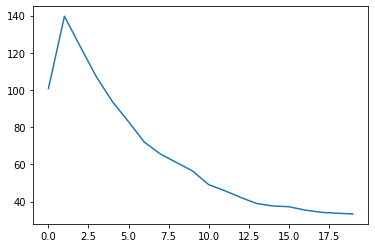

In [55]:
plt.plot(v_r)

In [40]:
vr = v_r[9:]
vb = v_b[9:]
wr = w_r[9:]
wb = w_b[9:]

In [48]:
#iis = np.where(np.logical_and(vr > 0, vr < 600))
iis = np.where(np.logical_and(vb > 0, vr < 600))
iis

(array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15]),)

In [49]:
vr = vr[iis]
vb = vb[iis]
wr = wr[iis]
wb = wb[iis]

y=0.103605x+(25.726400)


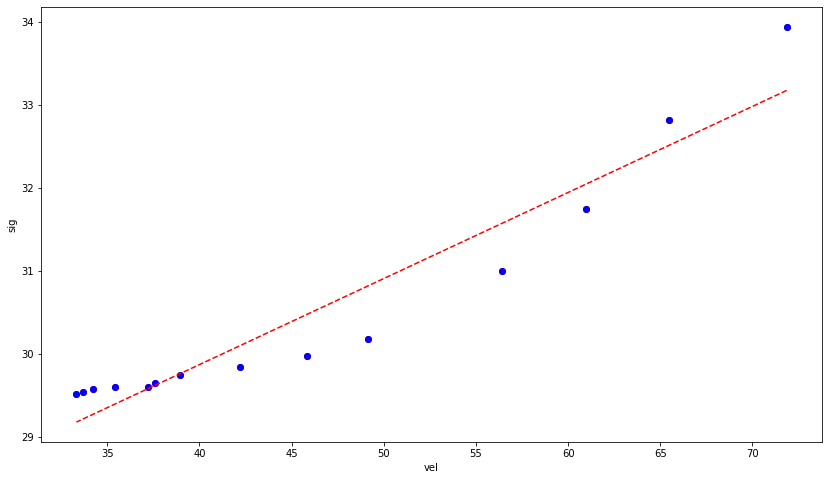

In [50]:
plt.figure(figsize=(14,8))
plt.plot(vr,wr,'o',color='red')
plt.plot(vb,wb,'o',color='blue')
plt.xlabel('vel')
plt.ylabel('sig')

# calc the trendline
z = np.polyfit(vr, wr, 1)
p = np.poly1d(z)
plt.plot(vr,p(vr),"r--")
# the line equation:
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))

In [51]:
js = np.where(np.logical_and(v_b > 0, v_r < 600))

In [52]:
v_r = v_r[js]
v_b = v_b[js]
w_r = w_r[js]
w_b = w_b[js]

Text(0, 0.5, 'sig')

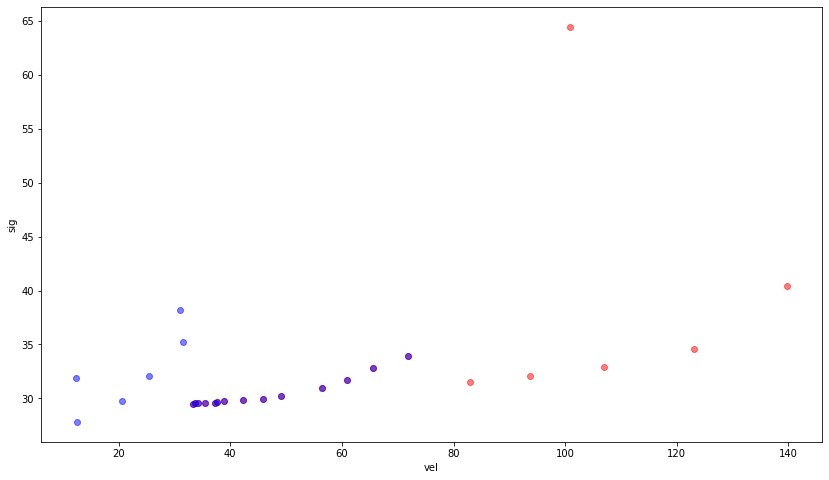

In [58]:
plt.figure(figsize=(14,8))
plt.plot(v_r,w_r,'o',color='red',alpha = 0.5)
plt.plot(v_b,w_b,'o',color='blue',alpha = 0.5)
plt.xlabel('vel')
plt.ylabel('sig')
